Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  

ValueError: num must be an integer with 1 <= num <= 9, not 10

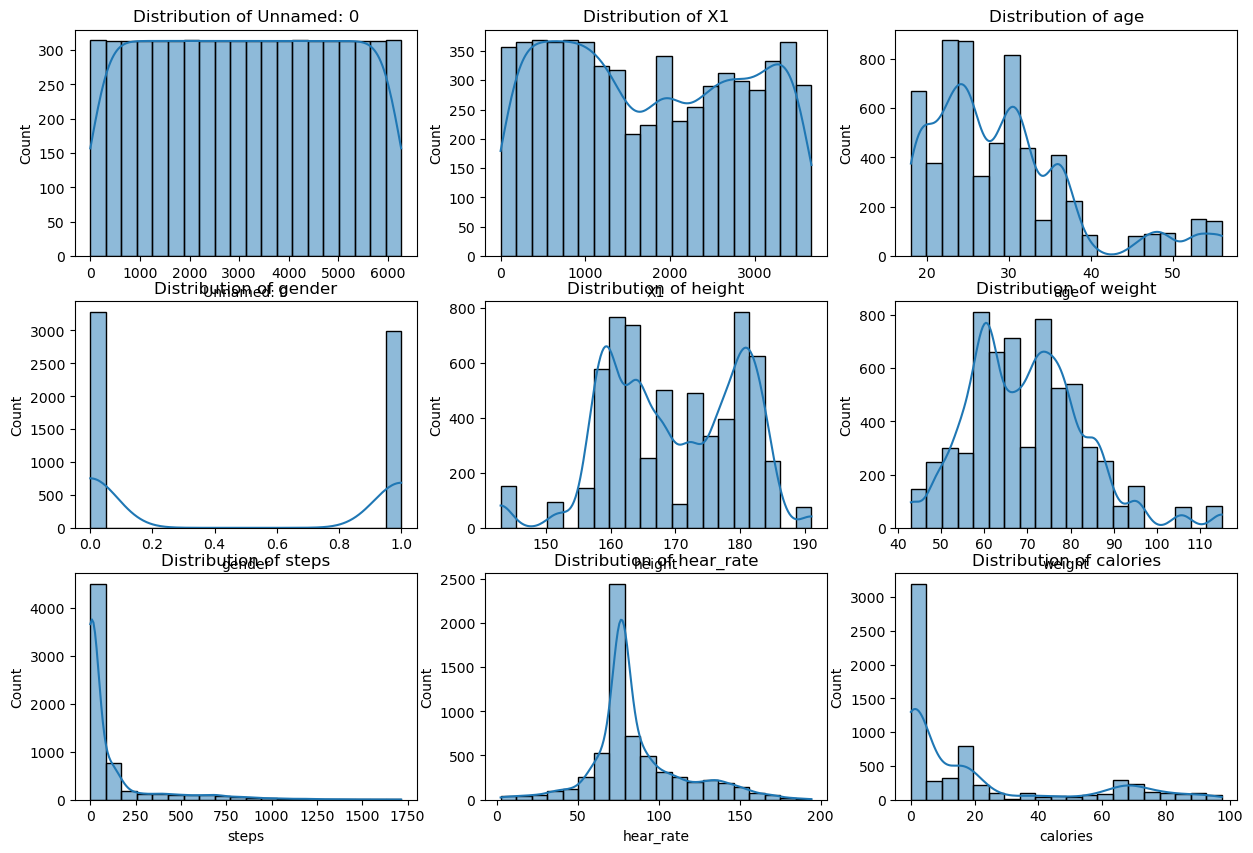

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your dataset from CSV
# Replace 'your_dataset.csv' with the path to your actual CSV file
df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv\aw_fb_data.csv')


# Step 2: Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Step 3: Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# Step 4: Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Step 5: Visualize Distributions of Numerical Features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Step 6: Visualize Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Pairplot for Numerical Features (optional)
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Step 8: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [3]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset
file_path = r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv\aw_fb_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


SMOTE (Synthetic Minority Over-sampling Technique)


In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv\aw_fb_data.csv')

# Assuming 'device' is the target variable and the others are features
X = df[['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 
         'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 
         'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance']]
y = df['device']  # Replace with your target variable column name

# Calculate the number of samples in the original dataset
original_size = len(df)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Ensure that the size of the resampled dataset matches the original size
# If the resampled size exceeds original size, randomly sample from it
if len(X_resampled) > original_size:
    X_resampled, y_resampled = X_resampled[:original_size], y_resampled[:original_size]

# Combine back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['device'] = y_resampled

# Save the resampled dataset
df_resampled.to_csv('resampled_dataset(smote).csv', index=False)
print("Resampled dataset saved as 'resampled_dataset(smote).csv'.")


Resampled dataset saved as 'resampled_dataset(smote).csv'.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the SMOTE dataset
smote_data = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\Graphics_Quality_Check\Graphics_Quality_Check\resampled_dataset(smote).csv')

# Prepare the data for SMOTE
def prepare_data(data, target_column='device'):
    if target_column not in data.columns:
        print(f"Warning: '{target_column}' not found in DataFrame. Generating a default target.")
        target_variable = [0] * (len(data) // 2) + [1] * (len(data) // 2)
        data[target_column] = target_variable[:len(data)]  # Ensure it matches the length of data
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return X, y

X_smote, y_smote = prepare_data(smote_data)

# Load the original test set
df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv\aw_fb_data.csv')  # Original dataset
X_test = df[['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 
              'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 
              'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance']]
y_test = df['device']  # Adjust this to your actual target variable

# Train and evaluate the model
def train_and_evaluate(X, y, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

# Evaluate on SMOTE data
print("SMOTE Results:")
print(train_and_evaluate(X_smote, y_smote, X_test, y_test))


SMOTE Results:
              precision    recall  f1-score   support

 apple watch       1.00      1.00      1.00      3656
      fitbit       1.00      1.00      1.00      2608

    accuracy                           1.00      6264
   macro avg       1.00      1.00      1.00      6264
weighted avg       1.00      1.00      1.00      6264



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the SMOTE dataset
smote_data = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\Graphics_Quality_Check\Graphics_Quality_Check\resampled_dataset(smote).csv')

# Prepare the data for SMOTE
def prepare_data(data, target_column='device'):
    if target_column not in data.columns:
        print(f"Warning: '{target_column}' not found in DataFrame. Generating a default target.")
        target_variable = [0] * (len(data) // 2) + [1] * (len(data) // 2)
        data[target_column] = target_variable[:len(data)]
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return X, y

X_smote, y_smote = prepare_data(smote_data)

# Load the original test set
df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv\aw_fb_data.csv')  # Original dataset
X_test = df[['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 
              'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 
              'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance']]
y_test = df['device']  # Adjust this to your actual target variable

# Train and evaluate the model with cross-validation and hyperparameter tuning
def train_and_evaluate(X, y, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
    # Set up the grid search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X, y)  # Fit the grid search on the training data
    
    best_model = grid_search.best_estimator_  # Get the best model from grid search
    y_pred = best_model.predict(X_test)  # Predict on the test set
    
    return classification_report(y_test, y_pred)

# Evaluate on SMOTE data
print("SMOTE Results:")
print(train_and_evaluate(X_smote, y_smote, X_test, y_test))


SMOTE Results:
              precision    recall  f1-score   support

 apple watch       1.00      1.00      1.00      3656
      fitbit       1.00      1.00      1.00      2608

    accuracy                           1.00      6264
   macro avg       1.00      1.00      1.00      6264
weighted avg       1.00      1.00      1.00      6264



SMOTER

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTER
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# Update the path below to the location of your dataset
df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv')  # Adjust the path as necessary

# Check the dataset structure (optional)
print(df.head())

# Assuming you have numerical features and a continuous target variable
# Replace 'feature1', 'feature2', etc. with your actual feature names
X = df[['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 
         'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 
         'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance']]
y = df['target']  # Replace 'target' with your actual target variable name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTER
smoter = SMOTER(sampling_strategy='auto', random_state=42)  # Adjust this as needed
X_resampled, y_resampled = smoter.fit_resample(X_train, y_train)

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['target'] = y_resampled  # Ensure this matches your actual target variable name

# Save the resampled dataset to a CSV file
df_resampled.to_csv('resampled_dataset_smoter.csv', index=False)
print("Resampled dataset saved as 'resampled_dataset_smoter.csv'.")

# Train a model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


ImportError: cannot import name 'SMOTER' from 'imblearn.over_sampling' (c:\Users\W4FGXUV\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\__init__.py)

In [10]:
pip install --upgrade imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [8]:
import imblearn
print(dir(imblearn.over_sampling))


['ADASYN', 'BorderlineSMOTE', 'KMeansSMOTE', 'RandomOverSampler', 'SMOTE', 'SMOTEN', 'SMOTENC', 'SVMSMOTE', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_adasyn', '_random_over_sampler', '_smote', 'base']


In [7]:
pip install --upgrade imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
from imblearn.over_sampling import SMOTE


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load your dataset
# Update the path below to the location of your dataset
#df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv')  # Adjust the path as necessary

# Check the dataset structure (optional)
print(df.head())

# Define features and target variable
X = df[['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 
         'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 
         'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance']]
y = df['device']  # Replace 'device' with your actual target variable column name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42)  # Adjust this as needed
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['device'] = y_resampled  # Ensure this matches your actual target variable name

# Save the resampled dataset to a CSV file
df_resampled.to_csv('resampled_dataset_adasyn.csv', index=False)
print("Resampled dataset saved as 'resampled_dataset_adasyn.csv'.")

# Train a model (e.g., Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


CTGAN

In [2]:
import pandas as pd
from ctgan import CTGAN

# Step 1: Load your dataset
df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv\aw_fb_data.csv')

# Step 2: Identify categorical columns and apply one-hot encoding
# Assuming 'device' and 'activity' are categorical columns
df_encoded = pd.get_dummies(df, columns=['device', 'activity'], drop_first=True)

# Step 3: Check for any non-numeric values in the DataFrame
print(df_encoded.dtypes)
print(df_encoded.head())

# Step 4: Initialize the CTGAN model
ctgan = CTGAN()

# Step 5: Fit the model to your dataset
ctgan.fit(df_encoded, epochs=100)

# Step 6: Generate synthetic data equal to the original dataset size
num_samples = len(df_encoded)  # Get the number of samples in the original dataset
synthetic_data = ctgan.sample(num_samples)  # Generate synthetic samples

# Display the generated synthetic data
print("Synthetic Data Generated Using CTGAN:")
print(synthetic_data.head())

# Step 7: Optionally save synthetic data to CSV
synthetic_data.to_csv('synthetic_data_ctgan.csv', index=False)
print("Synthetic data saved as 'synthetic_data_ctgan.csv'.")


Unnamed: 0                   int64
X1                           int64
age                          int64
gender                       int64
height                     float64
weight                     float64
steps                      float64
hear_rate                  float64
calories                   float64
distance                   float64
entropy_heart              float64
entropy_setps              float64
resting_heart              float64
corr_heart_steps           float64
norm_heart                 float64
intensity_karvonen         float64
sd_norm_heart              float64
steps_times_distance       float64
device_fitbit                 bool
activity_Running 3 METs       bool
activity_Running 5 METs       bool
activity_Running 7 METs       bool
activity_Self Pace walk       bool
activity_Sitting              bool
dtype: object
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1 

COMPARISION

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the synthetic datasets from CSV files
smote_data = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\Graphics_Quality_Check\Graphics_Quality_Check\resampled_dataset(smote).csv')
adasyn_data = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\Graphics_Quality_Check\Graphics_Quality_Check\resampled_dataset_adasyn.csv')
ctgan_data = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\Graphics_Quality_Check\Graphics_Quality_Check\synthetic_data_ctgan.csv')

# Define a function to extract features and target variable
def prepare_data(data, target_column='device'):
    if target_column not in data.columns:
        print(f"Warning: '{target_column}' not found in DataFrame. Generating a default target.")
        # Example of generating a default target variable
        target_variable = [0] * (len(data) // 2) + [1] * (len(data) // 2)
        data[target_column] = target_variable[:len(data)]  # Ensure it matches the length of data
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return X, y

# Prepare the data for SMOTE
X_smote, y_smote = prepare_data(smote_data)

# Prepare the data for ADASYN
X_adasyn, y_adasyn = prepare_data(adasyn_data)

# Prepare the data for CTGAN
X_ctgan, y_ctgan = prepare_data(ctgan_data)

# Load the original test set
df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv')  # Original dataset
X_test = df[['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 
              'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 
              'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance']]
y_test = df['device']  # Adjust this to your actual target variable

# Define the function to train and evaluate the model
def train_and_evaluate(X, y, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

# Evaluate on SMOTE data
print("SMOTE Results:")
print(train_and_evaluate(X_smote, y_smote, X_test, y_test))

# Evaluate on ADASYN data
print("ADASYN Results:")
print(train_and_evaluate(X_adasyn, y_adasyn, X_test, y_test))

# Evaluate on CTGAN data
print("CTGAN Results:")
print(train_and_evaluate(X_ctgan, y_ctgan, X_test, y_test))


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\W4FGXUV\\Downloads\\My\\aw_fb_data.csv'